# Basic statistics

This section is based on __['Modern Statistical Methods for Astronomy' - Feigelson & Babu](http://astrostatistics.psu.edu/MSMA/CUP_MSMA_discount.pdf)__

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn') # Change plot theme


A globular cluster is a densely packed, spherical collection of hundreds of thousands of stars. Image below is Messier 80. Thought to be over a 150 globular clusters in the Milky Way.

We will import data sets that give measurement of luminosities of the near-infrared __[K-band](https://en.wikipedia.org/wiki/Infrared_astronomy)__ for the Milky Way galaxy and Messier 31 in the Andromeda Galaxy.


In [19]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/A_Swarm_of_Ancient_Stars_-_GPN-2000-000930.jpg/800px-A_Swarm_of_Ancient_Stars_-_GPN-2000-000930.jpg", width=300, height=300)

In [4]:
# Read Milky Way Galaxy globular Cluster K magnitudes
gc_mwg=pd.read_csv('http://astrostatistics.psu.edu/MSMA/datasets/GlobClus_MWG.dat',delim_whitespace=True)
gc_mwg.head()

,MWG_GC,K
0,47_Tuc,-11.790
1,NGC_362,-10.694
2,NGC_1261,-9.452
3,Eridanus_4,-5.140
4,Pal_2,-13.515


In [8]:
gc_mwg.columns

Index(['MWG_GC', 'K'], dtype='object')

Text(0.5,1,'Milky Way \n Globular Clusters')

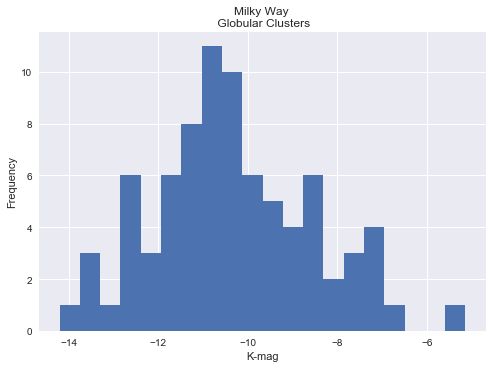

In [5]:
fig=plt.figure()
plt.hist(gc_mwg['K'],bins=20)
plt.xlabel('K-mag')
plt.ylabel('Frequency')
plt.title('Milky Way \n Globular Clusters')


Fit a normal distribution to data and estimate mean and standard deviation (via Maximum Likelihood).

In [7]:
param=stats.norm.fit(gc_mwg['K'])
print("Mean : % 5.2f, Stand. Dev : % 5.2f" %(param[0], param[1])) # Here I have used string formating 
                                                                  # to give the print output some style

Mean : -10.32, Stand. Dev :  1.79


## Over-plot a normal distribution. 
First create array of values, $x$ at which to calculate the probability. 

Use scipy packages to create the probability distribution function (pdf), have to provide the mean (location - loc) and standard deviation (scale) 

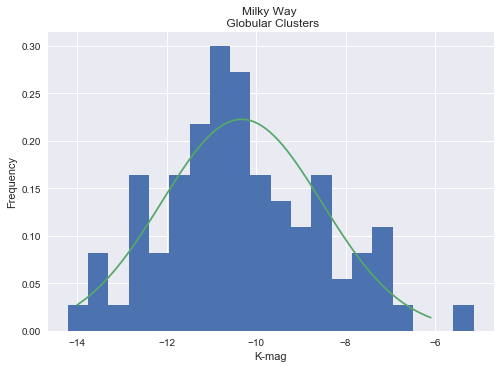

In [8]:
fig=plt.figure()
plt.hist(gc_mwg['K'],bins=20,density=True)
plt.xlabel('K-mag')
plt.ylabel('Frequency')
plt.title('Milky Way \n Globular Clusters')

x=np.arange(-14,-6,0.1)
plt.plot(x,stats.norm.pdf(x,loc=param[0],scale=param[1]))


This looks reasonable, but we can perform various statistical tests to see whether there is evidence the distribution is Normal.

Text(0.5,1,'Cumulative Distribution')

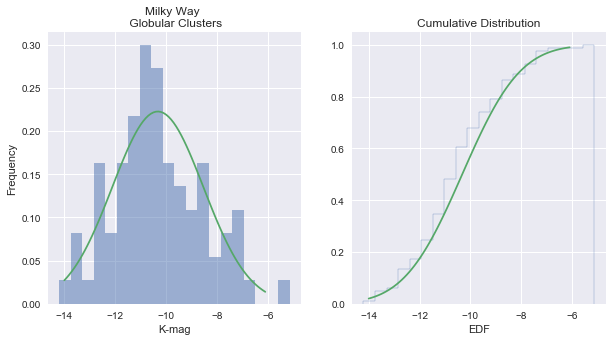

In [10]:
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.hist(gc_mwg['K'],bins=20,density=True,alpha=0.5)
ax1.set_xlabel('K-mag')
ax1.set_ylabel('Frequency')
ax1.set_title('Milky Way \n Globular Clusters')

x=np.arange(-14,-6,0.1)
ax1.plot(x,stats.norm.pdf(x,loc=param[0],scale=param[1]))

ax2.hist(gc_mwg['K'],bins=20,cumulative=True, density=True,histtype='step')
ax2.plot(x,stats.norm.cdf(x,loc=param[0],scale=param[1]))
ax2.set_xlabel('K-mag')
ax2.set_xlabel('EDF')
ax2.set_title('Cumulative Distribution')


In [37]:
print(stats.kstest( (gc_mwg['K']-param[0])/param[1],'norm'))

KstestResult(statistic=0.0685743870249994, pvalue=0.8407650842729528)


In [48]:
import statsmodels.api as stm


/Users/richardmorton/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [50]:
stm.stats.lilliefors(gc_mwg['K'])

(0.06881901822504477, 0.4112899621632136)

In [57]:
# Read M31 Galaxy globular Cluster K magnitudes
gc_m31=pd.read_csv('http://astrostatistics.psu.edu/MSMA/datasets/GlobClus_M31.dat',delim_whitespace=True)
gc_m31['K_corr']=gc_m31['K']-24.44  # Convert to absolute magntiudes M
param_m31=stats.norm.fit(gc_m31['K_corr'])
print("Mean : % 5.2f, Stand. Dev : % 5.2f" %(param_m31[0], param_m31[1])) 

Mean : -9.98, Stand. Dev :  1.19


Text(0.5,1,'M31 Globular Clusters')

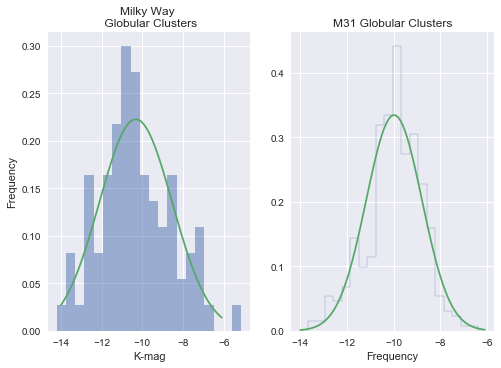

In [60]:
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.hist(gc_mwg['K'],bins=20,density=True,alpha=0.5)
ax1.set_xlabel('K-mag')
ax1.set_ylabel('Frequency')
ax1.set_title('Milky Way \n Globular Clusters')

x=np.arange(-14,-6,0.1)
ax1.plot(x,stats.norm.pdf(x,loc=param[0],scale=param[1]))

ax2.hist(gc_m31['K_corr'],bins=20,density=True,histtype='step')
ax2.plot(x,stats.norm.pdf(x,loc=param_m31[0],scale=param_m31[1]))
ax2.set_xlabel('K-mag')
ax2.set_xlabel('Frequency')
ax2.set_title('M31 Globular Clusters')